In [1]:
import numpy as np
import pandas as pd
import scipy.sparse.linalg
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# В этом проекте будем решать задачу бинарной классификации! 

# Признаки:

## V1-V28: 
Анонимные призаки, связанные с транзакциями (такие как время, локации и т.д.)

## Amount: 
Cумма транзакции

# Целевая переменная: 

## Class:
"0" - НЕ мошенническая транзакция 

"1" - мошенническая транзакция

In [2]:
data = pd.read_csv("/Users/jan/Downloads/creditcard_2023.csv")

In [3]:
data.head(10)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
5,5,0.025302,-0.140514,1.191138,-0.707979,0.430490,0.458973,0.611050,-0.092629,0.180811,...,-0.187739,-0.538518,-0.050465,-0.631553,-0.456480,0.252670,0.066681,0.095812,6901.49,0
6,6,1.016482,-0.397181,0.497868,-0.144463,0.331022,0.629243,0.431262,-0.134007,0.796159,...,-0.171137,-0.287017,-0.178197,-1.297597,1.182503,-0.604228,-0.198163,-0.087619,18954.45,0
7,7,-0.051306,-0.007194,1.139941,-0.877880,0.684668,0.714326,0.892615,-0.908409,0.901938,...,0.620676,-0.920426,0.034660,-1.091527,-0.742075,-0.104863,-1.382522,-2.748268,12298.23,0
8,8,-0.130680,-0.349547,0.425786,-0.760444,1.702777,2.324816,0.568968,0.049100,0.273118,...,-0.132787,-0.284700,-0.227779,2.248754,0.534846,-0.929738,-0.224385,0.243790,22052.90,0
9,9,0.058419,-0.093507,1.117270,-0.735172,0.466111,0.332371,0.683425,-0.136674,0.096409,...,-0.203634,-0.601581,-0.145082,-0.654783,-0.196621,0.226818,0.057119,0.100629,210.35,0


In [4]:
data.shape

(568630, 31)

Удалим id, так как скорее всего они были присвоены после некоторого упорядочивания данных, причем скорее всего по классам. Это нельзя считать объективным источником информации. К тому же этот признак очевидно не несет смысловой нагрузки.

In [5]:
data = data.drop(["id"], axis=1)

## Нарисуем распределение классов 

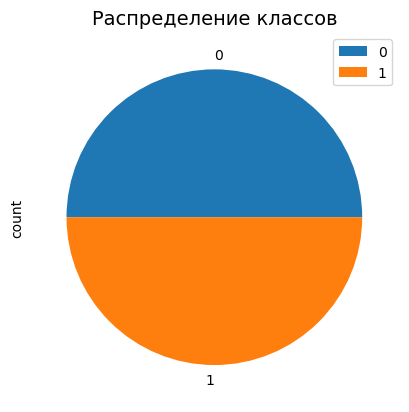

In [6]:
data["Class"].value_counts().plot.pie(legend=True)
plt.title('Распределение классов', size=14)
plt.show()

## Классы распределены равномерно! 

Теперь узнаем типы всех стобцов. Вдруг есть объектные колонки, которые нуждаются в предварительной обработке

In [7]:
col = data.columns
for i in col:
    print(f"тип колонки {i}:", data[i].dtype)

тип колонки V1: float64
тип колонки V2: float64
тип колонки V3: float64
тип колонки V4: float64
тип колонки V5: float64
тип колонки V6: float64
тип колонки V7: float64
тип колонки V8: float64
тип колонки V9: float64
тип колонки V10: float64
тип колонки V11: float64
тип колонки V12: float64
тип колонки V13: float64
тип колонки V14: float64
тип колонки V15: float64
тип колонки V16: float64
тип колонки V17: float64
тип колонки V18: float64
тип колонки V19: float64
тип колонки V20: float64
тип колонки V21: float64
тип колонки V22: float64
тип колонки V23: float64
тип колонки V24: float64
тип колонки V25: float64
тип колонки V26: float64
тип колонки V27: float64
тип колонки V28: float64
тип колонки Amount: float64
тип колонки Class: int64


Мы видим, что все признаки имеют тип float

Изучим пропуски в столбцах

In [8]:
data.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Пропусков в столбцах признаков нет

Описательные характеристики столбцов

In [9]:
data.describe().round(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,...,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.0
mean,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,12041.96,0.5
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,6919.64,0.5
min,-3.50,-49.97,-3.18,-4.95,-9.95,-21.11,-4.35,-10.76,-3.75,-3.16,...,-19.38,-7.73,-30.30,-4.07,-13.61,-8.23,-10.50,-39.04,50.01,0.0
25%,-0.57,-0.49,-0.65,-0.66,-0.29,-0.45,-0.28,-0.19,-0.57,-0.59,...,-0.17,-0.49,-0.24,-0.65,-0.55,-0.63,-0.30,-0.23,6054.89,0.0
50%,-0.09,-0.14,0.00,-0.07,0.08,0.08,0.23,-0.11,0.09,0.26,...,-0.04,-0.03,-0.06,0.02,-0.01,-0.01,-0.17,-0.01,12030.15,0.5
75%,0.83,0.34,0.63,0.71,0.44,0.50,0.53,0.05,0.56,0.59,...,0.15,0.46,0.16,0.70,0.55,0.67,0.33,0.41,18036.33,1.0
max,2.23,4.36,14.13,3.20,42.72,26.17,217.87,5.96,20.27,31.72,...,8.09,12.63,31.71,12.97,14.62,5.62,113.23,77.26,24039.93,1.0


Таблица корреляций

In [10]:
data.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,-0.561184,0.484499,-0.498963,0.517462,0.354728,0.573381,-0.226757,0.548973,0.599108,...,-0.034669,-0.073729,-0.068917,-0.014651,-0.008508,0.009281,-0.122772,0.070111,-0.001280,-0.505761
V2,-0.561184,1.000000,-0.627810,0.579638,-0.631669,-0.341040,-0.694022,0.191321,-0.585095,-0.621798,...,-0.013570,0.035346,0.151906,-0.027515,0.132443,0.012219,0.053835,0.021071,-0.000076,0.491878
V3,0.484499,-0.627810,1.000000,-0.687726,0.510351,0.508974,0.634336,-0.263018,0.648615,0.707676,...,-0.021710,-0.041970,-0.058884,0.076460,-0.076332,-0.052056,-0.190582,0.005346,-0.002001,-0.682095
V4,-0.498963,0.579638,-0.687726,1.000000,-0.429243,-0.474403,-0.588648,0.199013,-0.676648,-0.712839,...,-0.013093,0.091197,0.043266,-0.102508,0.029402,0.136679,0.188036,-0.011316,0.001859,0.735981
V5,0.517462,-0.631669,0.510351,-0.429243,1.000000,0.245187,0.586828,-0.314975,0.479614,0.563874,...,0.034147,-0.119152,-0.113919,-0.083243,-0.047845,0.047771,-0.043759,0.108422,-0.000016,-0.338639
V6,0.354728,-0.341040,0.508974,-0.474403,0.245187,1.000000,0.418703,-0.604491,0.432241,0.471000,...,-0.040153,0.036896,0.308598,-0.005237,-0.195340,-0.067605,-0.260783,-0.065641,0.000734,-0.435088
V7,0.573381,-0.694022,0.634336,-0.588648,0.586828,0.418703,1.000000,-0.180986,0.601789,0.678004,...,0.019627,-0.104043,-0.111177,-0.004152,0.000802,-0.006488,-0.036557,0.040732,0.001326,-0.491234
V8,-0.226757,0.191321,-0.263018,0.199013,-0.314975,-0.604491,-0.180986,1.000000,-0.208557,-0.199995,...,0.056416,-0.098752,-0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,-0.000208,0.144294
V9,0.548973,-0.585095,0.648615,-0.676648,0.479614,0.432241,0.601789,-0.208557,1.000000,0.748487,...,0.131001,-0.204723,-0.042371,0.044006,-0.034885,-0.131000,-0.111842,0.069959,-0.001589,-0.585522
V10,0.599108,-0.621798,0.707676,-0.712839,0.563874,0.471000,0.678004,-0.199995,0.748487,1.000000,...,0.037426,-0.150957,-0.056285,0.045935,-0.014045,-0.053684,-0.134907,0.035646,-0.001259,-0.673665


In [11]:
# Это функция для отрисовок двумерных распределнений классов
def plot_columns(col_1, col_2, data):
    x = data[col_1] 
    y = data[col_2] 
    plt.xlabel(col_1)
    plt.ylabel(col_2)
    classes = data["Class"]
    n = len(classes)
    i = 0
    while (i < n):
        if (classes[i] == 0):
            plt.plot(x[i], y[i], 'o', markersize=0.5, color="red")
        else:
            plt.plot(x[i], y[i], 'o', markersize=0.5, color="blue")
        i = i + 1
    plt.show()

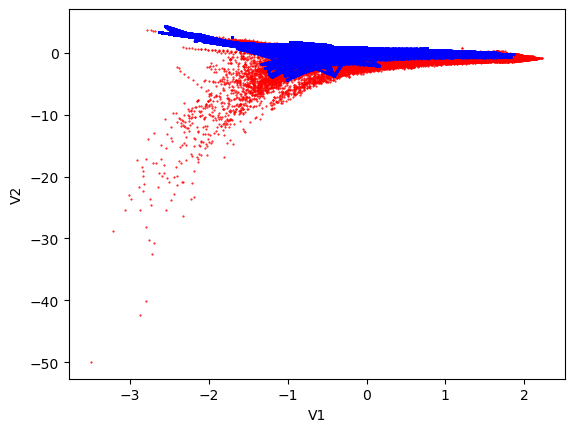

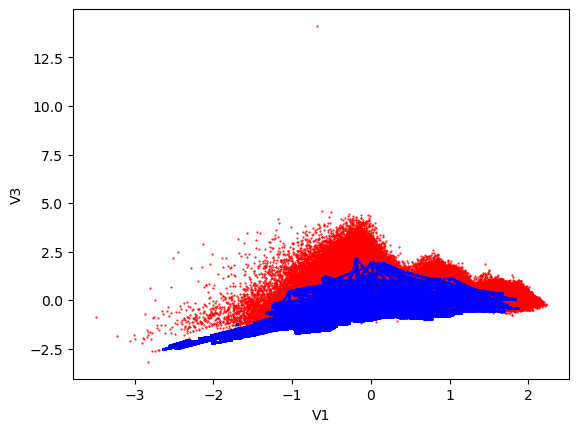

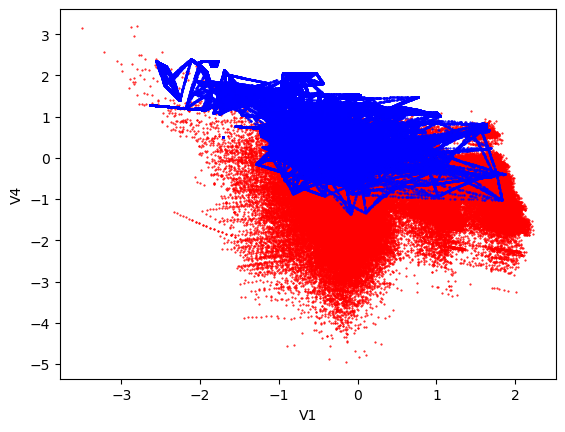

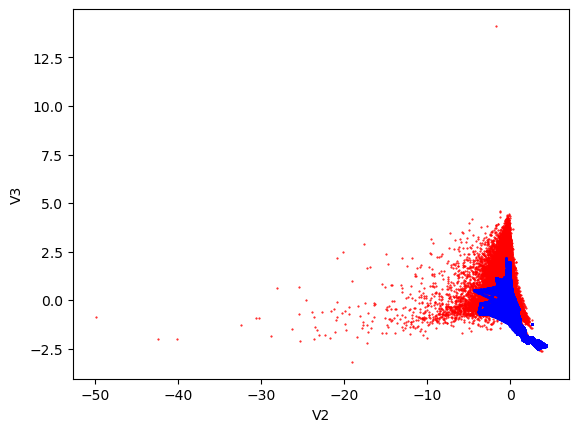

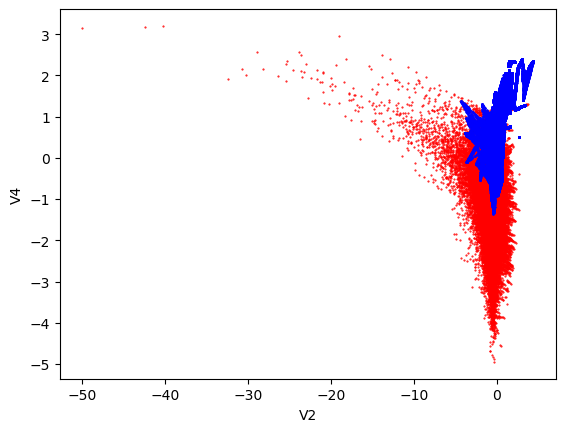

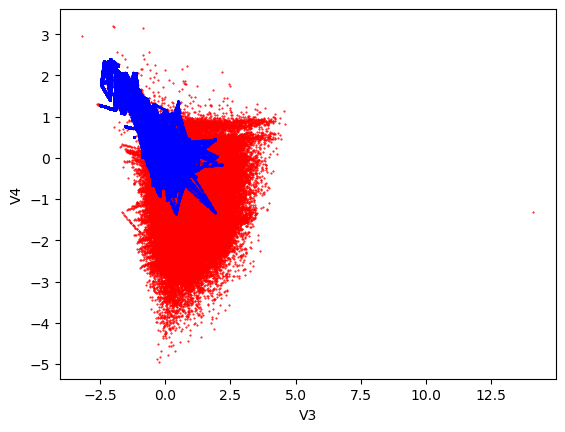

In [12]:
#Отрисуем классы по двум признакам на плоскости
col = data.columns
n = 4
i = 0
while (i < n - 1):
    j = i + 1
    while (j < n):
        plot_columns(col[i], col[j], data)
        j = j + 1
    i = i + 1

В целом, видно, что класс "0" имеет больший разброс по данным чем класс "1". К тому же в классе "0" есть выбросы. По картинкам заметно, что существенная доля класса "0" отделима прямой линией от остальных точек. Отсюда можно сделать вывод, что линейные алгоритмы и алгоритм случайного леса должны хорошо обучаться на этих данных.

## Разделим data на целевую переменную y и признаки X, а потом y на y_train и y_test и X на X_train и X_test

In [13]:
X = data.drop(["Class"], axis=1)
y = data[["Class"]]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Обучим несколько моделей 

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [16]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, np.ravel(y_train))
y_predict = clf.predict(X_test)
y_train_new = clf.predict(X_train)
print("ACCURACY:", accuracy_score(y_predict, y_test))
print("F_1:", f1_score(y_test, y_predict))
print("RECALL", recall_score(y_test, y_predict))

ACCURACY: 0.9583501867060596
F_1: 0.9574808050221124
RECALL 0.9363061797752809


In [17]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, np.ravel(y_train))
y_predict = clf.predict(X_test)
y_train_new = clf.predict(X_train)
print("ACCURACY:", accuracy_score(y_predict, y_test))
print("F_1:", f1_score(y_test, y_predict))
print("RECALL", recall_score(y_test, y_predict))

ACCURACY: 0.5070432442889049
F_1: 0.480378162943739
RECALL 0.4549508426966292


In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, np.ravel(y_train))
y_predict = clf.predict(X_test)
y_train_new = clf.predict(X_train)
print("ACCURACY:", accuracy_score(y_predict, y_test))
print("F_1:", f1_score(y_test, y_predict))
print("RECALL", recall_score(y_test, y_predict))

ACCURACY: 0.9998710350608773
F_1: 0.9998712712548713
RECALL 1.0


## Логистическая регрессия неплохо обучилась, на основе нее можно сделать вывод о значимости и вкладе определенных признаков.
## Метод опорных векторов не смог обучиться на этих данных.
## Случайный лес обучился шикарно! Он нашел все мошеннические транзакции (RECALL равен 100 %) и имеет очень высокую точность прогноза равную 99.987% 

Теперь займемся конструированием новых признаков и их обработкой 

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X["Amount"] = scaler.fit_transform(X[["Amount"]])

In [20]:
#Новые признаки полученные с помощью обработки старых по средствам функций exp, log, sin, cos и т.д.
col = X.columns
for i in col:
    X[i + "_exp"] = np.exp(0.1 * X[i])
    X[i + "_log"] = np.log(np.abs(X[i]) + 1)
    X[i + "**2"] = X[i] ** 2
    X[i + "_sqr"] = (np.abs(X[i]) + 1) ** (0.5)
    X[i + "_sin"] = np.sin(X[i])
    X[i + "_cos"] = np.cos(X[i])
    X[i + "_rev"] = 1/(np.abs(X[i]) + 1)
    X[i + "_e"] = 1/(1 + np.exp(-0.1 * X[i]))
    

In [21]:
#Нормальная нормировка
from sklearn.preprocessing import StandardScaler
col = X.columns
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=col)

In [22]:
#Анализ независимых компонент
#На основе этого метода мы получим новые признаки из старых, которые будут независимы между собой
from sklearn.decomposition import FastICA

ica = FastICA()
X = pd.DataFrame(ica.fit_transform(X))

In [23]:
#Уберем признаки, которые имеют слишком слабую линейную зависимость с целевой переменной
#Это нужно, чтобы избежать переобучения
col = X.columns
new_col = []
for i in col:
    if (abs(X[i].corr(y["Class"])) > 0.01):
        new_col.append(i)
        
X = X[new_col]

In [24]:
#Выделим колонки с достаточно высокой корелляцией по меркам этой задачи
col = X.columns
top_col = []
for i in col:
    if (abs(X[i].corr(y["Class"])) > 0.15):
        top_col.append(i)
    
print(top_col)

[22, 61, 171]


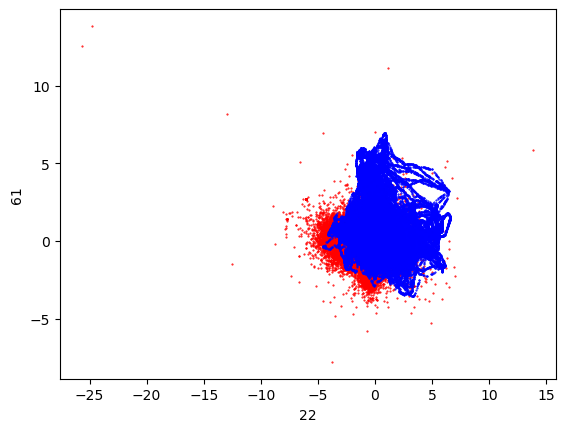

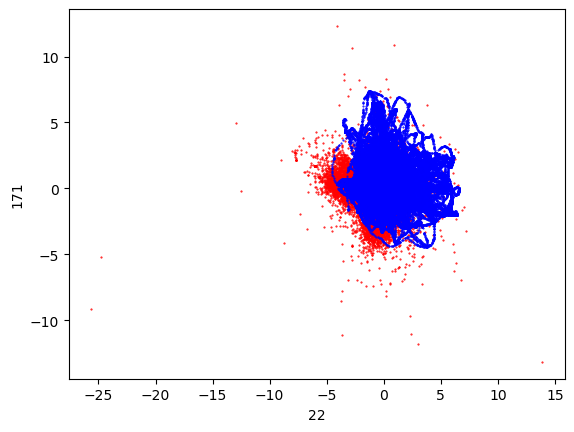

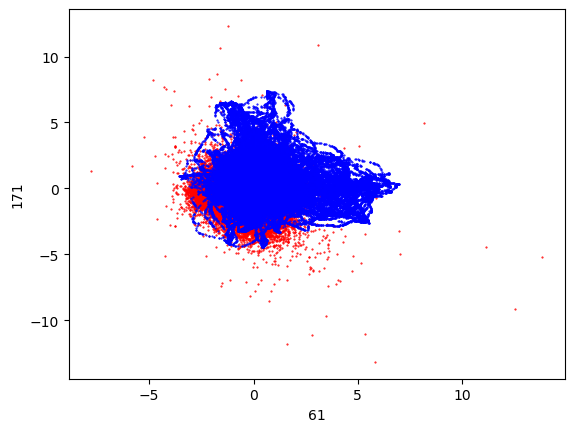

In [25]:
#Отрисуем классы по двум признакам на плоскости
n = len(top_col)
i = 0
X_copy = X.copy()
X_copy = X_copy[top_col]
X_copy["Class"] = y
while (i < n - 1):
    j = i + 1
    while (j < n):
        plot_columns(top_col[i], top_col[j], X_copy)
        j = j + 1
    i = i + 1

После обработки старых данных мы потеряли в способности попарно разделять два класса. Это видно по картинкам. Качество модели случайного леса скорее всего упадет. Но линейные модели должны начать работать лучше за счет независимости новых признаков и их разнообразия.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, np.ravel(y_train))
y_predict = clf.predict(X_test)
print("ACCURACY:", accuracy_score(y_predict, y_test))
print("F_1:", f1_score(y_test, y_predict))
print("RECALL", recall_score(y_test, y_predict))

ACCURACY: 0.9823786996816911
F_1: 0.9823521123453021
RECALL 0.9792017790262172


In [28]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, np.ravel(y_train))
y_predict = clf.predict(X_test)
print("ACCURACY:", accuracy_score(y_predict, y_test))
print("F_1:", f1_score(y_test, y_predict))
print("RECALL", recall_score(y_test, y_predict))

ACCURACY: 0.9995662088411328
F_1: 0.999567135018777
RECALL 1.0


In [29]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, np.ravel(y_train))
y_predict = clf.predict(X_test)
print("ACCURACY:", accuracy_score(y_predict, y_test))
print("F_1:", f1_score(y_test, y_predict))
print("RECALL", recall_score(y_test, y_predict))

ACCURACY: 0.9999120693596891
F_1: 0.9999122226968699
RECALL 0.9999531835205993


# После обработки:

## Логистическая регрессия начала работать заметно лучше, точность выросла более чем на 2%, а recall более чем на 4%

## Метод опорных векторов обучился просто отлично! Модель нашла все плохие транзакции recall = 100% и имеет очень высокую точность равную 99,96%

## А вот Случайный лес теперь НЕ имеет recall = 100%, хоть точность и подросла. Можно считать, что модель начала работать хуже.

# ВАЖНОЕ ЗАМЕЧАНИЕ: 
## Даже эту модель случайного леса можно чуть подправить и она скорее всего будет иметь recall = 100% 
## Это можно сделать, например, с помощью смещения границы принятия решений 
## Но точность скорее всего просядет и модель не будет работать лучше чем до обработки 

# ИТОГ:

## Две лучшие модели:
## RandomForestClassifier (до обработки): accuracy = 99.987% и recall = 100%
## SVM (после обработки): accuracy = 99.958% и recall = 100%